In [2]:
'''---------------------------------------------
CSC535-FA2021
Data Mining
Final Group Project

Maria deliverable #1: 
The top 6 best performing players per position based on game statistics 
Positions: Pitcher, Catcher, 1B, 2B, 3B, Short stop, Right fielder, Left fielder, Center fielder, Out fielder and Designated Hitter

'''
import pandas as pd
import numpy as np

In [3]:
#loading CSV file and saving it as a DataFrame
roster_file = 'data/full_roster.csv'
df = pd.read_csv(roster_file)

In [9]:
#preprocessing original data before other classification and clustering occurs    
#Dataframe of each player's position count
labels = df[['Position']]
positions = df[['P','C','1B','2B','3B','SS','LF','CF','RF','OF']]
data = positions.values.tolist()
salary = df[['Name', 'G', 'GS', 'Salary', 'WAR']]


In [10]:
#implementing knn model and training it on the iris data
#knn algorithm for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#training KNN model over iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Create standardizer
standardizer = StandardScaler()

X_std = standardizer.fit_transform(X)
knn = KNeighborsClassifier(n_neighbors=11, n_jobs=-1).fit(X_std, y)
knn.predict(X)

#running KNN model over our dataset
# pos = positions.drop(['Position'], axis=1)
# labels = np.array(['SP', 'RP','C','1B','2B','3B','SS','LF','CF','RF','OF'])
labels = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
# X1_std = standardizer.fit_transform(positions)
X1_std = np.array(data)
knn = KNeighborsClassifier(n_neighbors=11, n_jobs=-1).fit(X1_std, labels)
knn.predict(positions)  
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

ValueError: Found input variables with inconsistent numbers of samples: [51, 12]

[ 5  9  1  8  3  3  2  3 10  3  3  3  3  1  3  1  7  3  1  3  3  3  3  0
  3  3  3  1  3  1  3  0  3  3  4  6  3  3  3  1  3  3  3  2  3  3  1  3
  3  4  3]


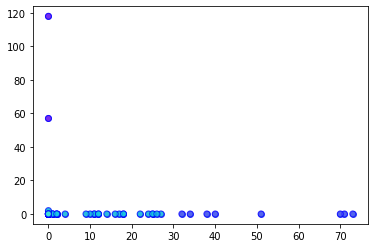

In [ ]:
#implementing birch algorithm for clustering the data into 11 clusters
from sklearn.cluster import Birch
from matplotlib import pyplot as plt

X = np.array(positions)
plt.scatter(X[:,0], X[:,1], alpha=0.7, edgecolors='b')

birch_train = Birch(branching_factor = 50, n_clusters = 11, threshold=0.5, compute_labels=True)
birch_train.fit(X)
predictions = np.array(birch_train.predict(X))

print(predictions)
plt.scatter(X[:,0], X[:,1], c=predictions, cmap='rainbow', alpha=0.7, edgecolors='b')

In [7]:
#inplementing Bernoulli algorithm for classification
from sklearn.naive_bayes import BernoulliNB
import numpy as np
# rng = np.random.RandomState(1)
# X = rng.randint(5, size=(6, 100))
X = np.array(positions)
Y = np.array(labels)
bnb = BernoulliNB()
bnb.fit(X, Y)
bnb.score(X, Y,sample_weight=50)

# plt.scatter(X[:,0], X[:,1], c=predictions, cmap='rainbow', alpha=0.7, edgecolors='b')
print(bnb.predict(X[2:3]))

C:\Users\maria\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


TypeError: Expected sequence or array-like, got <class 'int'>

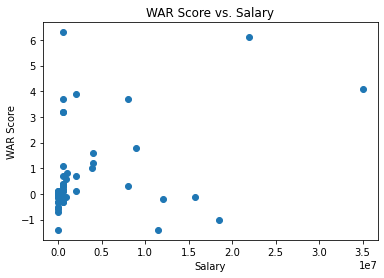

In [ ]:
#Maria deliverable 2
#graph if a player's performance is directly proportional to their salary/contract
import matplotlib.pyplot as plt

#create a scatterplot of player's salary vs. their WAR score
plt.scatter(df['Salary'],df['WAR'])
plt.xlabel('Salary')
plt.ylabel('WAR Score')
plt.title('WAR Score vs. Salary')
plt.show()

In [ ]:
# Using decision tree to determine if a player's performance is directly proportional to their salary/contract
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

x = df[['Salary']].copy()
y = df['WAR'].copy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

clf_model = DecisionTreeRegressor(random_state=1)
clf_model.fit(X_train, y_train)
y_predict = clf_model.predict(X_test)

print('Accuracy:', clf_model.score(X_test, y_test))

Accuracy: -0.014342887055684095
